In [35]:
import pandas as pd
import numpy as np
df = pd.read_csv('netflix_titles.csv')
df.head(4)

Unnamed: 0 show_id     type                  title         director  \
0           0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1           1      s2  TV Show          Blood & Water              NaN   
2           2      s3  TV Show              Ganglands  Julien Leclercq   
3           3      s4  TV Show  Jailbirds New Orleans              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   

                                         description  duration_num  \
0  As her father nears the end of his life, filmm...          90.0   
1  After crossing paths at a party, a Cape Town t...           2.0   
2  To protect his family from a powerful drug lor...           1.0   
3  Feuds, flirtations and toilet talk go down amo...           1.0   

  duration_unit  
0           min  
1        season  
2        season  
3        season

## Grafico de correlacion
 * Pregunta, el largo de los titulos tiene que ver con el el año del release?

In [37]:
df['num_words_title'] = df['title'].str.split().str.len()

In [39]:
df.head(4)

Unnamed: 0 show_id     type                  title         director  \
0           0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1           1      s2  TV Show          Blood & Water              NaN   
2           2      s3  TV Show              Ganglands  Julien Leclercq   
3           3      s4  TV Show  Jailbirds New Orleans              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   

                                         description  duration_num  \
0  As her father nears the end of his life, filmm...          90.0   
1  After crossing paths at a party, a Cape Town t...           2.0   
2  To protect his family from a powerful drug lor...           1.0   
3  Feuds, flirtations and toilet talk go down amo...           1.0   

  duration_unit  num_words_title  
0           min                4  
1        season                3  
2        season                1  
3        season                3

In [41]:
df[['title', 'num_words_title']]

title  num_words_title
0      Dick Johnson Is Dead                4
1             Blood & Water                3
2                 Ganglands                1
3     Jailbirds New Orleans                3
4              Kota Factory                2
...                     ...              ...
8802                 Zodiac                1
8803            Zombie Dumb                2
8804             Zombieland                1
8805                   Zoom                1
8806                 Zubaan                1

[8807 rows x 2 columns]

In [43]:
df.describe()

Unnamed: 0  release_year  duration_num  num_words_title
count  8807.000000   8807.000000   8807.000000      8807.000000
mean   4403.000000   2014.180198     69.848530         3.110821
std    2542.506244      8.819312     50.806431         1.862154
min       0.000000   1925.000000      1.000000         1.000000
25%    2201.500000   2013.000000      2.000000         2.000000
50%    4403.000000   2017.000000     88.000000         3.000000
75%    6604.500000   2019.000000    106.000000         4.000000
max    8806.000000   2021.000000    312.000000        17.000000

In [13]:
#Dataframe para analisis de correlacion
df[['title', 'num_words_title']].sample(5)

title  num_words_title
8226                           The Break-Up                2
8168                                  Terra                1
2117                 Crazy Awesome Teachers                3
5720  Einsatzgruppen: The Nazi Death Squads                5
1251                     Dances with Wolves                3

In [59]:
#df.info()
#df = df.drop(columns=['Unnamed: 0'])
#Como me marca errores al hacer la correlacion de todo el dataframe le sigo que solo lo haga a las columnas que son numericas
df_numeric = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = df_numeric.corr() # Esto se convierte en mi matriz de correlacion

In [63]:
#Correlacion Heatmap
# Se calcula la correlacion entre las variables numericas del Dataframe
#Muestro la variable de correlacion
corr_matrix

release_year  duration_num  num_words_title
release_year         1.000000     -0.249188         0.022114
duration_num        -0.249188      1.000000        -0.058352
num_words_title      0.022114     -0.058352         1.000000

In [65]:
# Esto indica que a medida que el tiempo pasa, el largo de los titulos, sigue siendo el mismo
# Y ademas la duracion se ha ido acortando

In [71]:
#Importo la libreeria plotly
import plotly.express as px

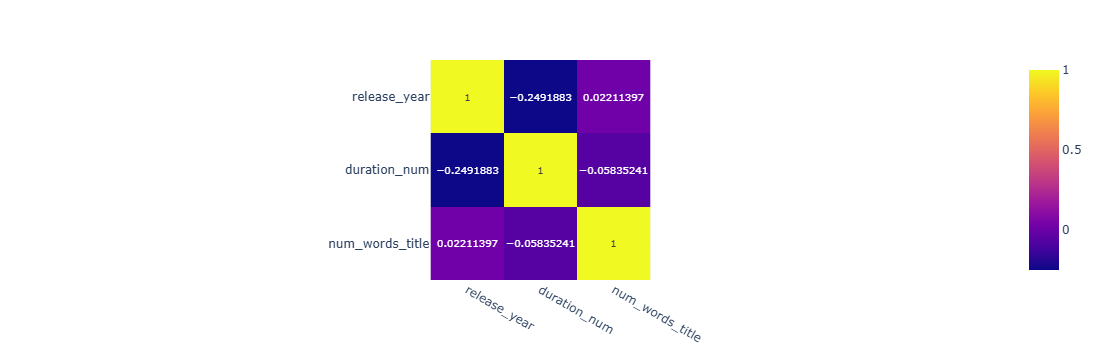

In [81]:
fig = px.imshow(corr_matrix, text_auto=True)
fig.show()

In [85]:
#Como se estan tomando en cuenta las peliculas y las series que pasaria si solo se toman en cuenta las peliculas
df_movies = df[df['type'] == 'Movie']

In [87]:
df_numeric2 = df_movies.select_dtypes(include=['int64', 'float64'])
corr_matrix2 = df_numeric2.corr() # Esto se convierte en mi matriz de correlacion

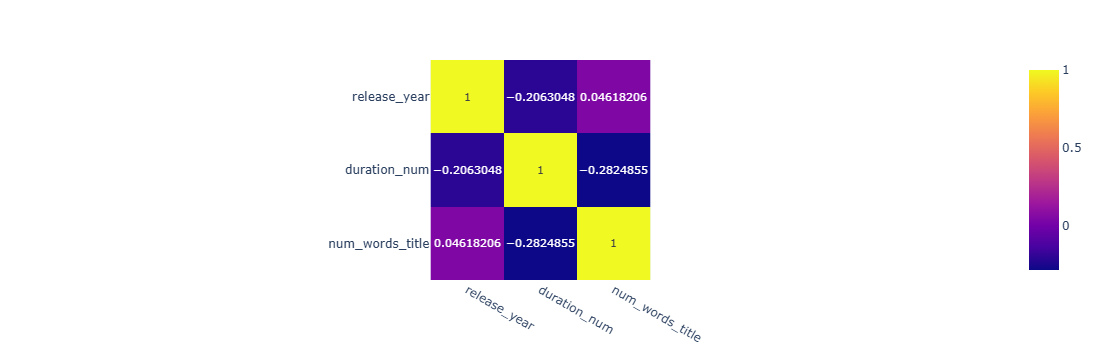

In [89]:
fig = px.imshow(corr_matrix2, text_auto=True)
fig.show()

## Grafico de estadisticos

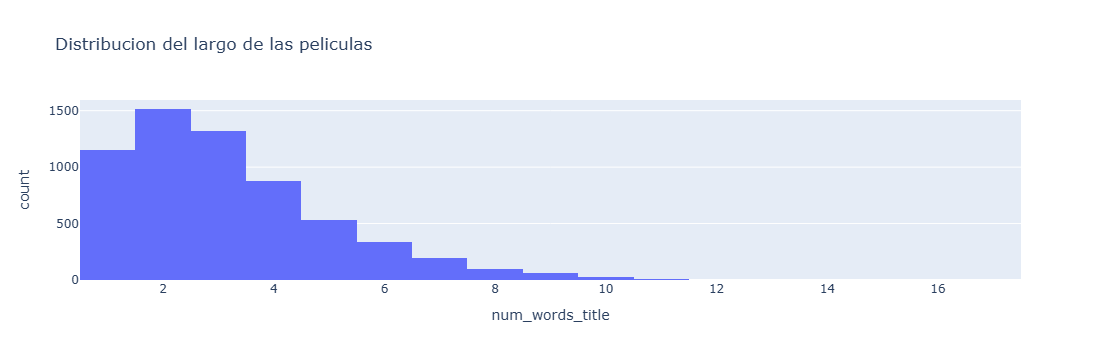

In [100]:
# Histograma
fig = px.histogram(df_movies, x="duration_num", title="Distribucion del largo de las peliculas", nbins = 20)
fig.show()

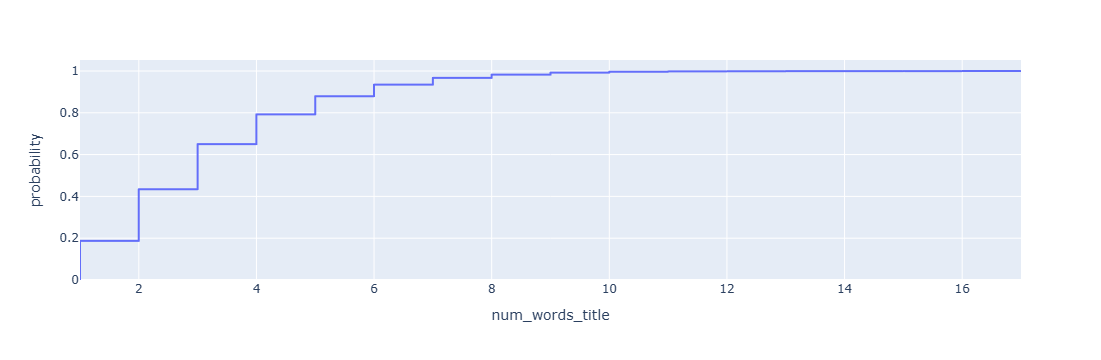

In [102]:
# Distribucion acumulada
fig = px.ecdf(df_movies, x="num_words_title")
fig.show()
# Eso nos dice que el 20% de los datos tienen menos de 2 palabras
# Tambien dice que el 60% de los datos tienen menos de 4 palabras en el titulo

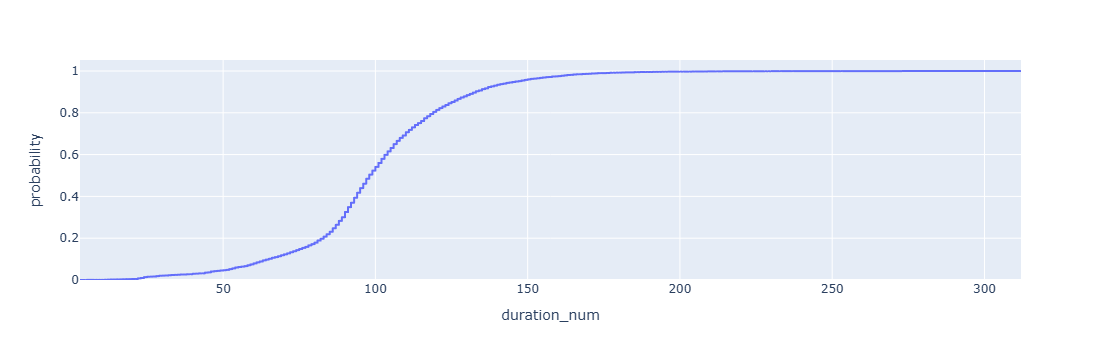

In [108]:
# Distribucion acumulada para peliculas
fig = px.ecdf(df_movies, x="duration_num")
fig.show()
# Nos dice que menos del 50% tiene menos de 100 minutos

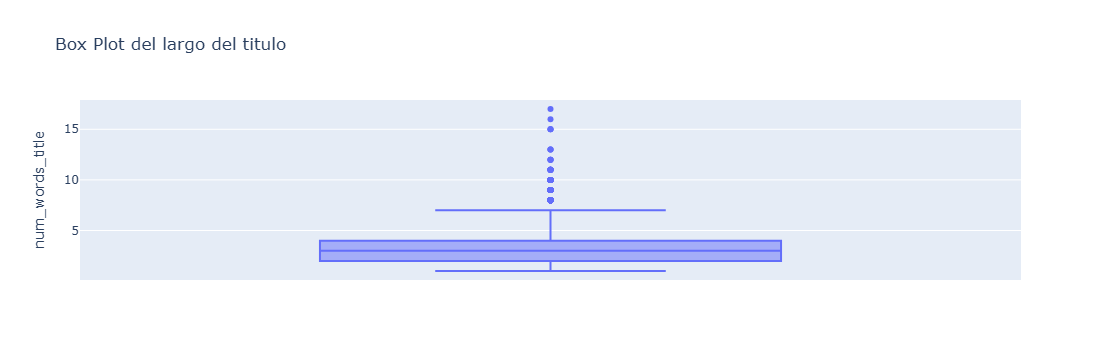

In [114]:
# Grafico de Blox plot
fig = px.box(df_movies, y="num_words_title", title="Box Plot del largo del titulo")
fig.show()

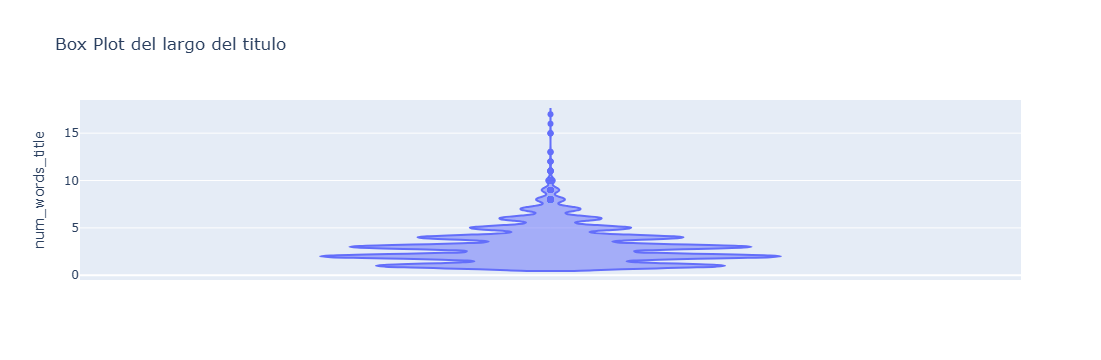

In [116]:
# Grafico de violin
fig = px.violin(df_movies, y="num_words_title", title="Box Plot del largo del titulo")
fig.show()

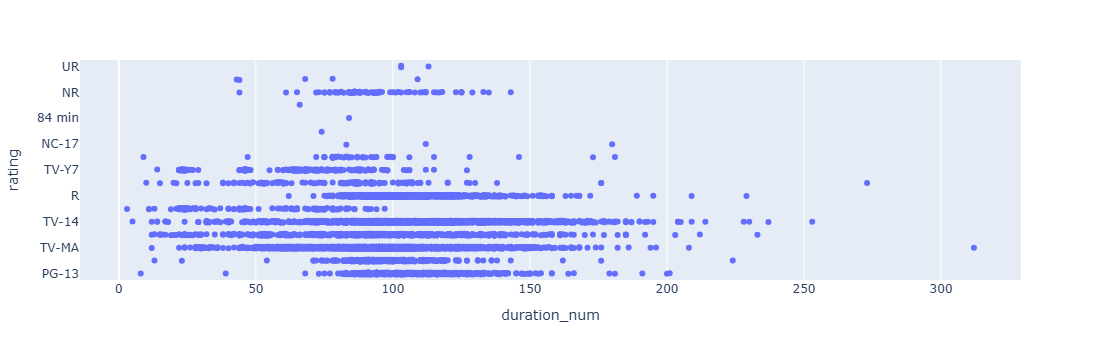

In [121]:
# Strip
# Esto me da una dsitribucion por categoria
fig = px.strip(df_movies, x="duration_num", y="rating")
fig.show()

In [125]:
# Strip
# Esto me da una dsitribucion por categoria
fig = px.strip(df_movies, x="duration_num", y="release_year")
fig.show()

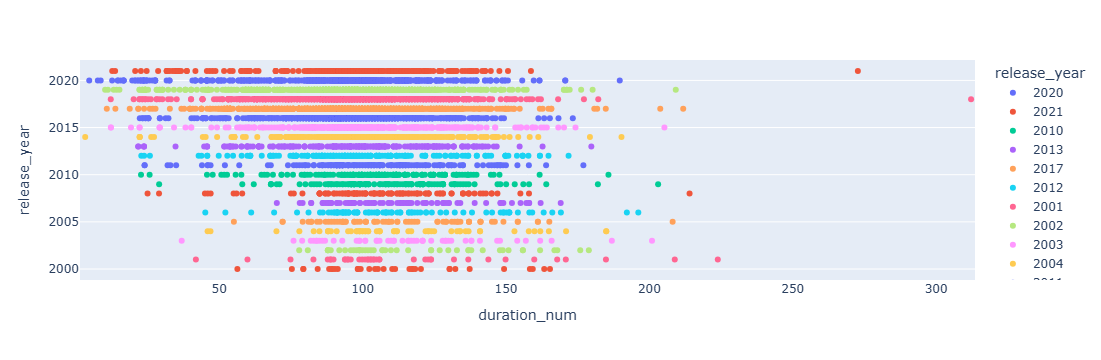

In [129]:
# Strip
# Esto me da una dsitribucion por categoria
fig = px.strip(df_movies[df_movies['release_year'] > 1999], x="duration_num", y="release_year", color="release_year")
fig.show()

# Graficos Multipanel

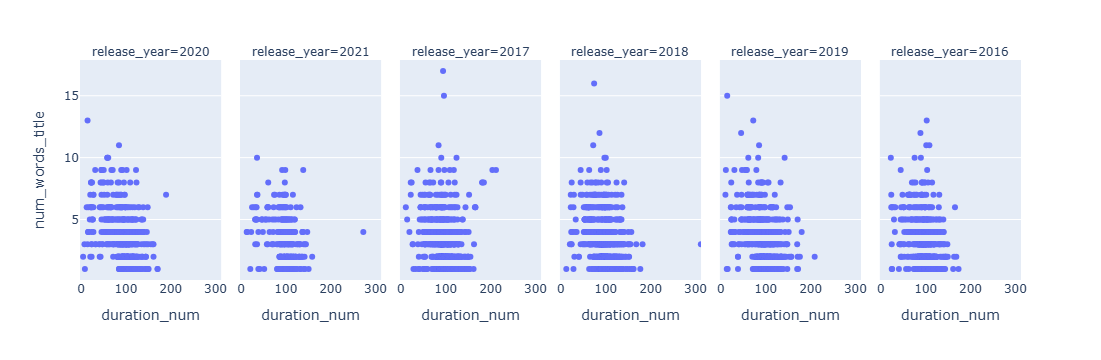

In [136]:
# Facet Charts
fig = px.strip(df_movies[df_movies['release_year'] > 2015], x="duration_num", y="num_words_title", facet_col="release_year", color="type")
fig.show()

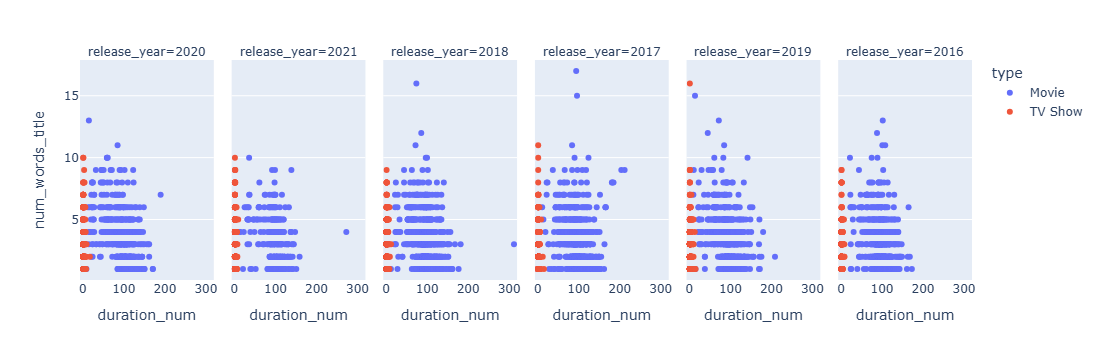

In [138]:
fig = px.strip(df[df['release_year'] > 2015], x="duration_num", y="num_words_title", facet_col="release_year", color="type")
fig.show()

# Graficas de scatter plot

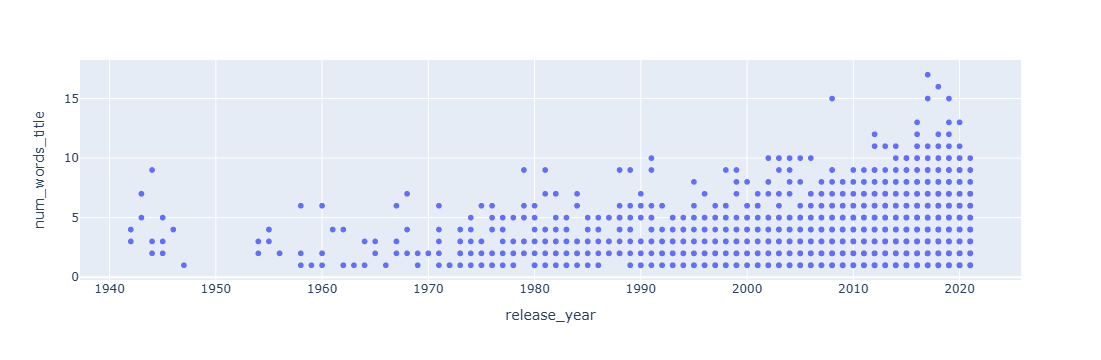

In [147]:
fig = px.scatter(df_movies, x="release_year", y="num_words_title")
fig.show()

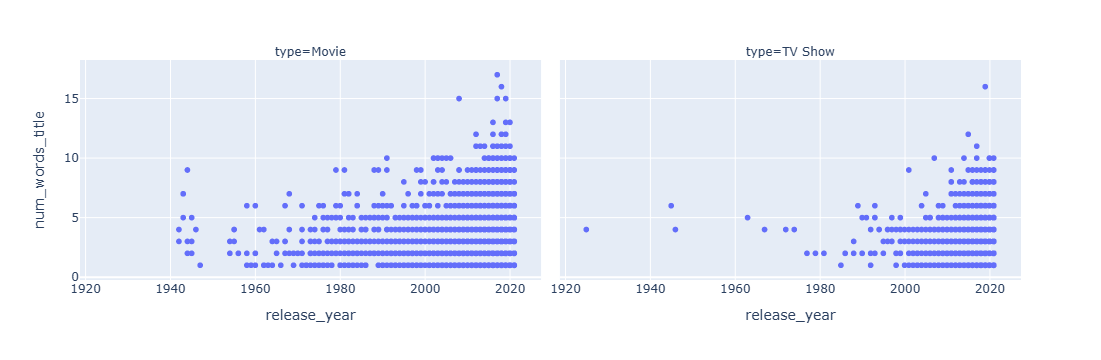

In [151]:
fig = px.scatter(df, x="release_year", y="num_words_title", facet_col="type")
fig.show()

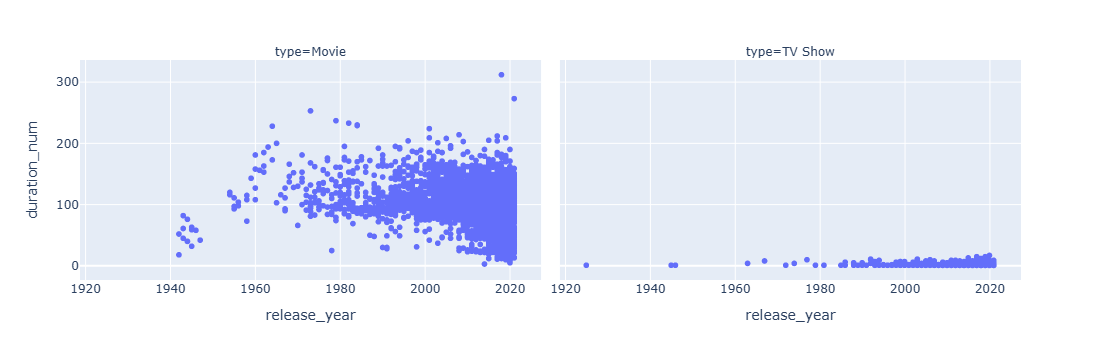

In [153]:
fig = px.scatter(df, x="release_year", y="duration_num", facet_col="type")
fig.show()

# Mapas de Calor

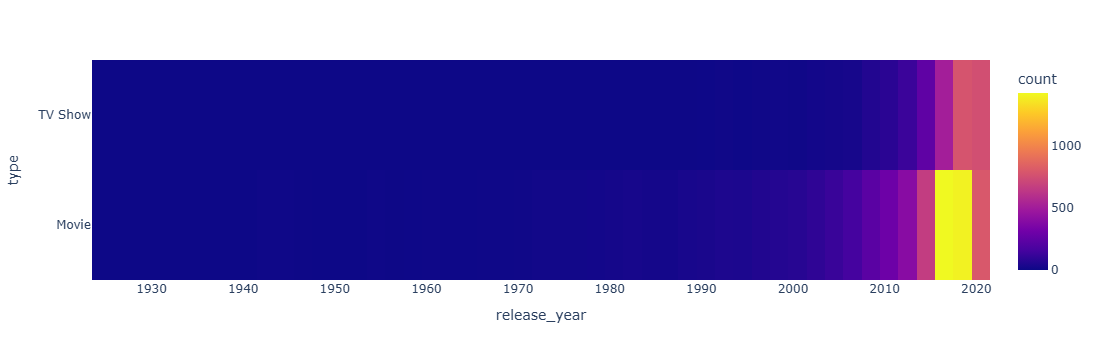

In [156]:
#Mapa de calor inicial
px.density_heatmap(df, x="release_year", y="type")

In [158]:
# Nuevo dataframe para el release del año 2000
df_2000 = df

In [160]:
index_2000 = df_2000[(df_2000['release_year']) < 2000].index
df_2000.drop(index_2000, inplace=True)

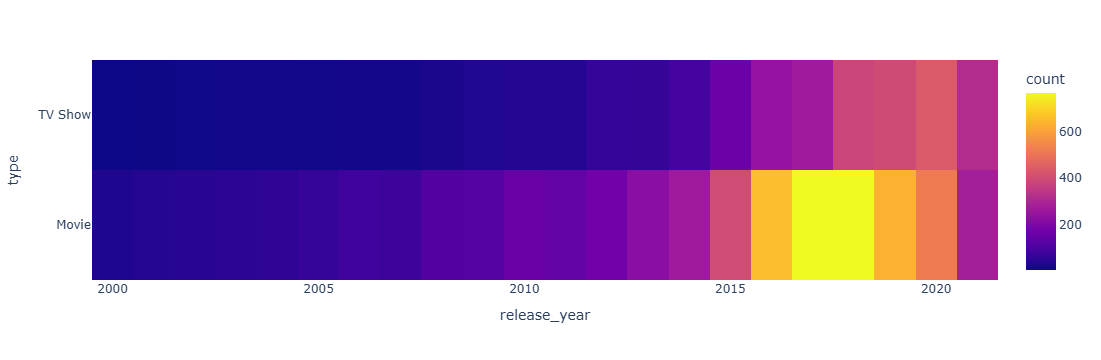

In [162]:
# Mapa de calor del año 2000 por titulo
px.density_heatmap(df_2000, x="release_year", y="type")

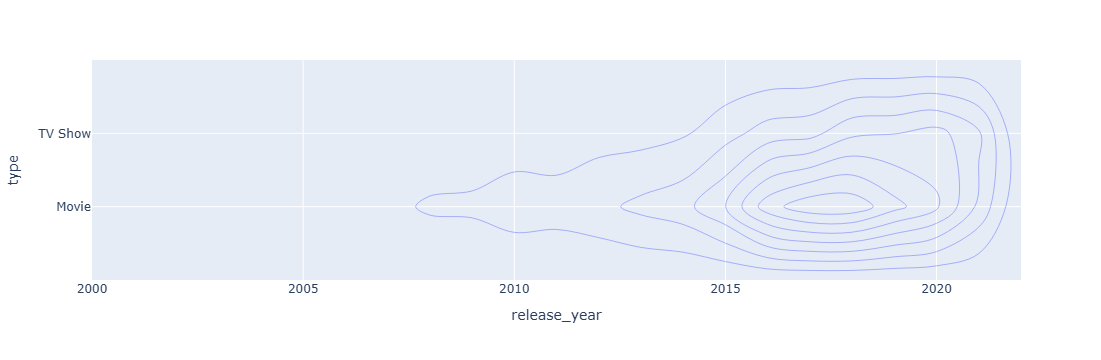

In [166]:
#Grafico de countour
fig = px.density_contour(df[df['release_year'] > 2000], x="release_year", y="type")
fig.show()

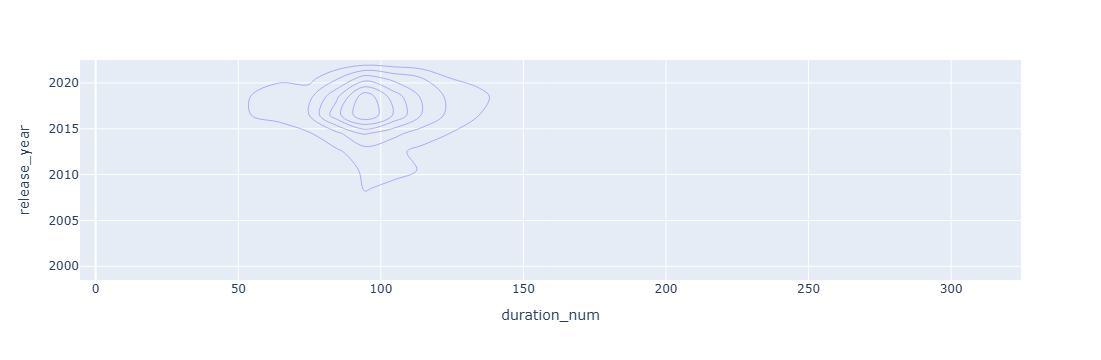

In [170]:
#Grafico de countour
fig = px.density_contour(df_movies[df_movies['release_year'] > 2000], x="duration_num", y="release_year")
fig.show()